# Guitar ETL and EDA

In [1]:
import os, io, requests, csv, sys

import pandas as pd
import numpy as np
pd.options.display.max_rows = 999
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt

from scipy.stats import boxcox
from operator import itemgetter
from datetime import datetime

In [2]:
sys.path.insert(0, 'objects')
sys.path.insert(0, 'data')
sys.path.insert(0, 'pickles')

### Here's a Class with *Lots* of Attributes (Features)

Some ducking was required to handle auctions missing certain details.

In [3]:
from Shade_Sale import Shade_Sale

### Loop Through All Item JSON Data Files, Instantiate Class Objects

In [4]:
file_names = [name for name in os.listdir('data/specs/') if not name.startswith('.')] # Ignores hidden files on mac


In [5]:
items = []
for filename in file_names:
    try:
        this_item = Shade_Sale('data/listings', 'data/specs', filename)
        if "LOT" not in this_item.title.upper() and this_item.country_seller == 'US' and this_item.price < 1500:# and this_item.price > 50:
            items.append(this_item)
    except ValueError:
        print('valerror')
        pass

In [6]:
len(items) # Our sample size.

14431

********

## EDA

**********

__Price Distribution:__

In [7]:
orig_prices = pd.Series([item.price for item in items], name = 'prices')

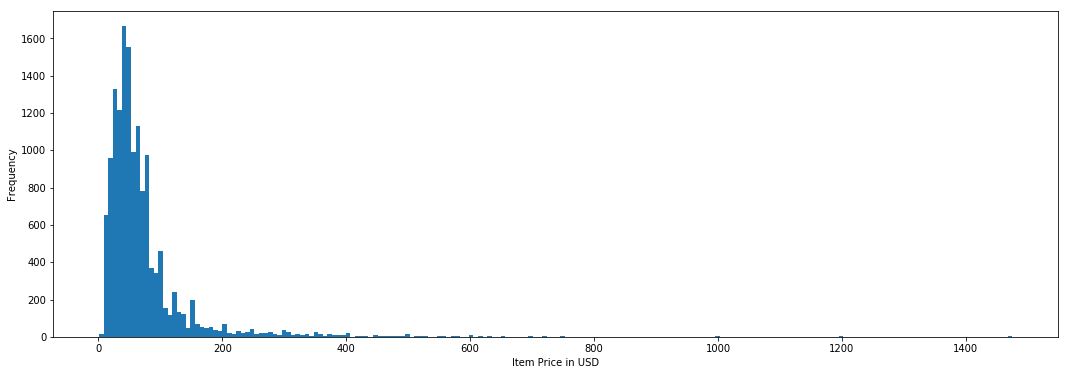

In [8]:
plt.figure(figsize = (18,6))
plt.hist(orig_prices, bins=200)
plt.ylabel('Frequency')
plt.xlabel('Item Price in USD')
plt.show()

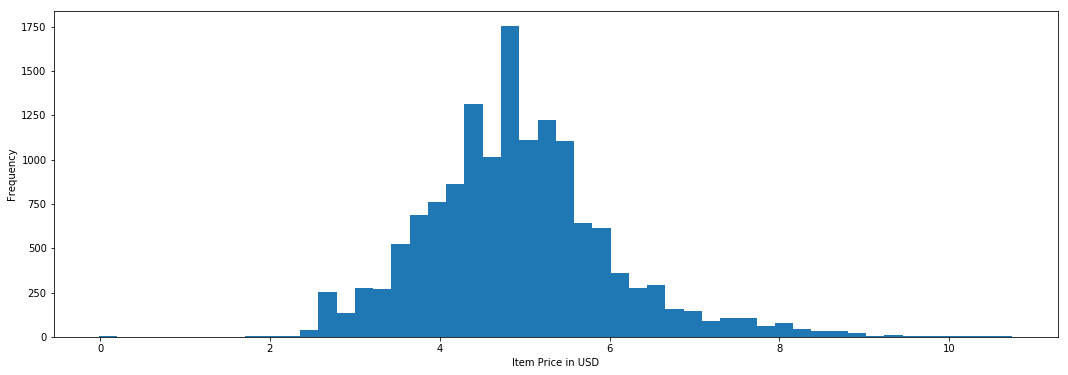

In [9]:
# prices = pd.Series([axe.price_usd for axe in axes])

BOXCOX_LAM = .1

prices = pd.Series(boxcox([item.price for item in items], lmbda=BOXCOX_LAM), name = 'price')

plt.figure(figsize = (18,6))
plt.hist(prices, bins=50)
plt.ylabel('Frequency')
plt.xlabel('Item Price in USD')
plt.show()

Some of the most expensive items:

In [10]:
spensive = [{'name':item.title,
             'price': item.price} for item in items]
sorted(spensive, key=itemgetter('price'))[-5:]

[{'name': 'MUST DE CARTIER SUNGLASSES', 'price': 1300.0},
 {'name': 'Vintage Cartier 18K Gold Plated Sapphire Sunglasses 57-18',
  'price': 1399.0},
 {'name': 'Cartier 140 | 54MM | Wood Rimless Gold Eyeglasses w/ Case 318618 Made in France',
  'price': 1450.0},
 {'name': 'Oakley C Six # 71 Of 1500 Aluminum Frame W/ Grey Lens NICE!!  Oakley Sunglasses',
  'price': 1475.0},
 {'name': 'CARTIER GIVERNY GOLD & WOOD 53/22 FULL SET BROWN LENS FRANCE SUNGLASSES',
  'price': 1475.0}]

**********

__Text Fields, for NLP:__

Listing Title:

In [11]:
[item.title for item in items][:20] # All listings must have a title

['Maui Jim MJ-178-02 US Pat Black Sunglasses (Made In Japan)',
 'Carrera By Safilo CA7574 1P5 53[]19 145 Eyeglasses/Sunglasses',
 'Kirkland Signature sunglasses KS #67 Missoula Gunmetal Flex Hinge 61/13-140 6120',
 'Ray Ban New Wayfarer 6181/85 55[]18 145 3N Sunglasses (Made In Italy)',
 'Custom Polarized Oakley Radar EV Pitch Sunglasses W/ Case White & Brown\xa0',
 'EMPORIO ARMANI Sunglasses frames EA 4041 5017/81 56/18/140 3P Black Square C580',
 'MAUI JIM MJ253-25A Sunglass Frames Sand Island 63/15/120 Flex Hinge HA03',
 "Genuine Giorgio Armani GA 954/S RAY/LF Sunglasses Authentic Men's Sunglasses",
 'Authentic RayBan Sunglasses RB 3530 002 58-17-140 Black METAL CRYSTAL ITALY U126',
 'RAY BAN SUNGLASSES RB 2132 6052 BLACK CRYSTAL 55-18-145 ITALY L381',
 "Men's Used White Spy Optics Ken Block Helm #43 Black Reflective Lenses - EUC!",
 'Ray Ban Black W1308 XSAR Classic Sunglasses',
 'Ray Ban New Wayfarer RB 2132 901 52[]18 3N Sunglasses (Made In Italy)',
 'Ray Ban Aviator Large Metal 

Mean Length of Title:

In [12]:
mean_title_len = sum(len(item.title) for item in items)/len(items)
print(f'{round(mean_title_len)} characters per title on average.')

59 characters per title on average.


In [13]:
print(f'{round(sum(1 for item in items if len(item.title) < 46) / len(items)*100,2)}% of listings have less than 46 characters in the title.')


24.39% of listings have less than 46 characters in the title.


Maybe "title has length less than 46 characters" should be a one-hot variable.

Listing __Sub__titles:

In [14]:
[item.subtitle for item in items if item.subtitle != None][-5:]
print(f'{round(((len([item.subtitle for item in items if item.subtitle != None]) / len(items))*100),2)}% of listings include a subtitle.')

0.66% of listings include a subtitle.


Condition Descriptions:

In [15]:
[item.condition_description for item in items if item.condition_description != None][-5:]
print(f'{round(((len([item.condition_description for item in items if item.condition_description != None]) / len(items))*100),2)}% of listings include a condition description.')

26.41% of listings include a condition description.


Example of Description Full Text:

In [16]:
print([item.description for item in items][20:22])
print(f'\n{round(((len([item.description for item in items if item.description != None]) / len(items))*100),2)}% of listings include a text description.')

['Authentic Ray Ban Aviator RB3025 58 14 Sunglasses Overall Condition: USED/GOOD Frame Color - Silver Condition: GOOD Some light wear/marks. Lens Color - PurpleCondition: FAIRClearly visible wear/marks. *Pictures above are actual photos of item*Comes with black generic nylon pouch carrying case*FL Residents 7% Sales Tax*FAST SHIPPING!* CHECK OUT OUR OTHER LISTINGS!!!!We do our best to bring you accurate descriptions. If you need any additional pictures or have ANY Questions BEFORE OR AFTER PURCHASE please MESSAGE US. We will do our Best to Resolve Any Issues. DBB', 'Authentic Miu Miu SMU03D 1BM-1Z1 Sunglasses Overall Condition: USED/GOOD Frame Color - Caramel Striped Condition: GOOD Some light wear/marks. Lens Color - Brown GradientCondition: GOODSome light wear/marks. *Pictures above are actual photos of item*Comes with black generic nylon pouch carrying case*FL Residents 7% Sales Tax*FAST SHIPPING!* CHECK OUT OUR OTHER LISTINGS!!!!We do our best to bring you accurate descriptions. If

***********

__Number of Pics on eBay listing:__

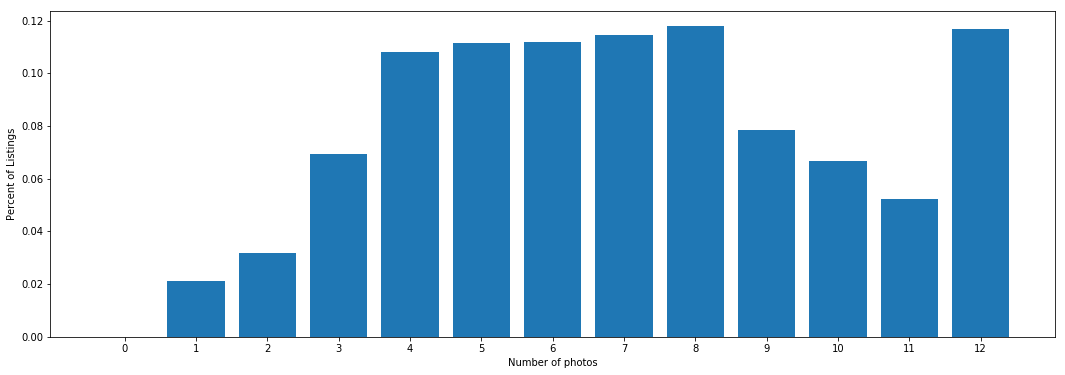

In [17]:
pic_quants = pd.Series([item.pic_quantity for item in items]).value_counts()
plt.figure(figsize = (18,6))
plt.bar(pic_quants.index, pic_quants.values/len(items))
plt.xticks(pic_quants.index)
plt.xlabel("Number of photos")
plt.ylabel("Percent of Listings")
plt.show()

In [18]:
for num_photos in range(13,0,-1):
    print(f'{round(len([item.pic_quantity for item in items if item.pic_quantity < num_photos]) / len(items) * 100, 1)}% of auctions have less than {num_photos} photos.')

100.0% of auctions have less than 13 photos.
88.3% of auctions have less than 12 photos.
83.1% of auctions have less than 11 photos.
76.5% of auctions have less than 10 photos.
68.6% of auctions have less than 9 photos.
56.8% of auctions have less than 8 photos.
45.4% of auctions have less than 7 photos.
34.2% of auctions have less than 6 photos.
23.0% of auctions have less than 5 photos.
12.2% of auctions have less than 4 photos.
5.3% of auctions have less than 3 photos.
2.1% of auctions have less than 2 photos.
0.0% of auctions have less than 1 photos.


__Thumbnail Image URLs__ — for Potential (CNN, maybe) Image Analysis as a factor in price

In [19]:
[item.pic for item in items][:5] # Just first five. You get it

['http://thumbs2.ebaystatic.com/m/mlcJF_Iq6ZEtpuJ5KeBnrAw/140.jpg',
 'http://thumbs4.ebaystatic.com/m/mS9w4dnFsLfZX7HEnz1Uhqg/140.jpg',
 'http://thumbs4.ebaystatic.com/m/ma_DLNX5V-rBj1zvPZMq8Qg/140.jpg',
 'http://thumbs2.ebaystatic.com/m/mUTswdJN4u90RETTulqY0hA/140.jpg',
 'http://thumbs1.ebaystatic.com/m/mvXXGm1sfTQQjfvDEioaEnw/140.jpg']

**********

**Shipping Type:**

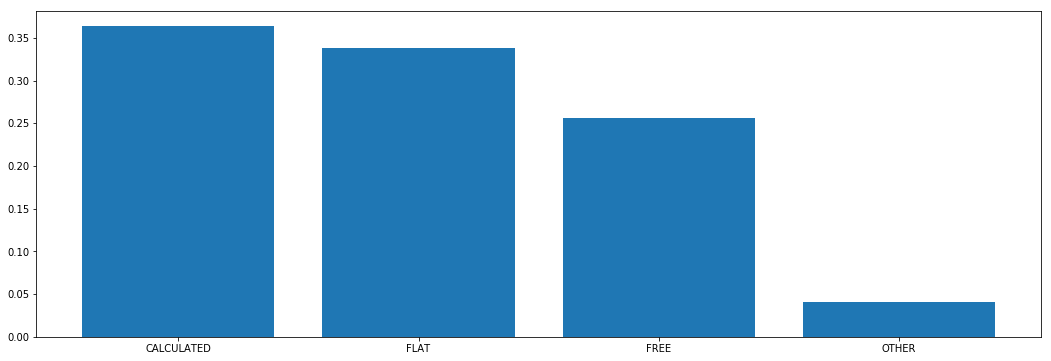

In [20]:
plt.figure(figsize = (18,6))
ship_counts = pd.Series([item.ship_type for item in items]).value_counts()
plt.bar(ship_counts.index, ship_counts.values/len(items))
plt.show()

In [21]:
ship_counts.index

Index(['CALCULATED', 'FLAT', 'FREE', 'OTHER'], dtype='object')

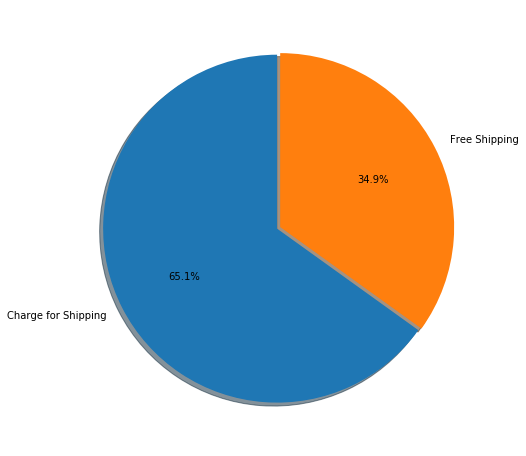

In [22]:
free = pd.Series([item.price_shipping == 0 for item in items]).value_counts()
plt.figure(figsize = (8,8))
plt.pie(free.values, explode=[.01,.01], labels=['Charge for Shipping', 'Free Shipping'], 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

**Offering Expedited Shipping:**

$2.35 - Average shipping cost (including free shipping)
$6.72 - Average shipping cost (if charging for shipping)


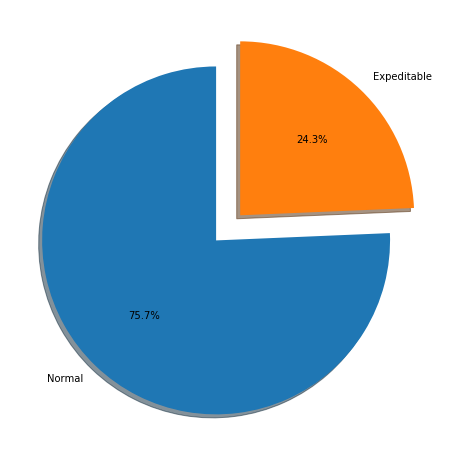

In [23]:
print(f'${round(sum(item.price_shipping for item in items) / len([item.price_shipping for item in items]),2)} - Average shipping cost (including free shipping)')
print(f'${round(sum(item.price_shipping for item in items if item.price_shipping != 0) / len([item.price_shipping for item in items if item.price_shipping]),2)} - Average shipping cost (if charging for shipping)')

exp = pd.Series([item.ship_expedite for item in items]).value_counts()
plt.figure(figsize = (8,8))
plt.pie(exp.values, explode=[.1,.1], labels=['Normal', 'Expeditable'], 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

****

__Listing Types:__

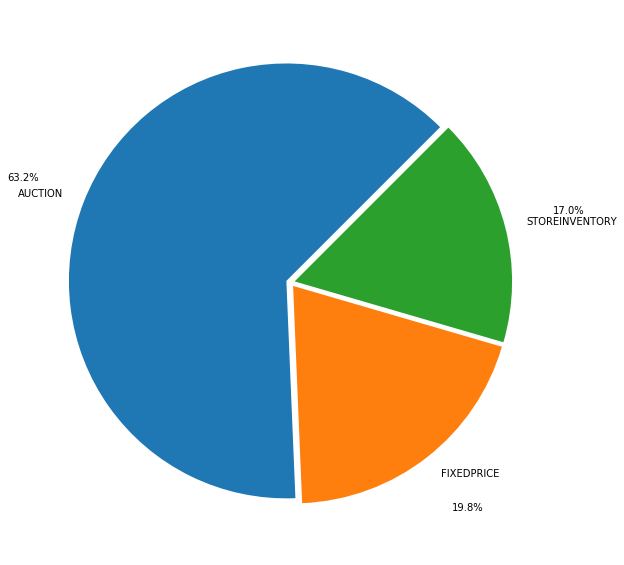

In [24]:
listing_types = pd.Series([item.listing_type for item in items if item.listing_type != None]).value_counts()
plt.figure(figsize = (10,10))
plt.pie(listing_types.values, 
        labels = listing_types.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=45,
        explode = np.full(len(listing_types), .02))
plt.show()

****

__TEMPORAL STUFF__

**Handling Time in Days:**

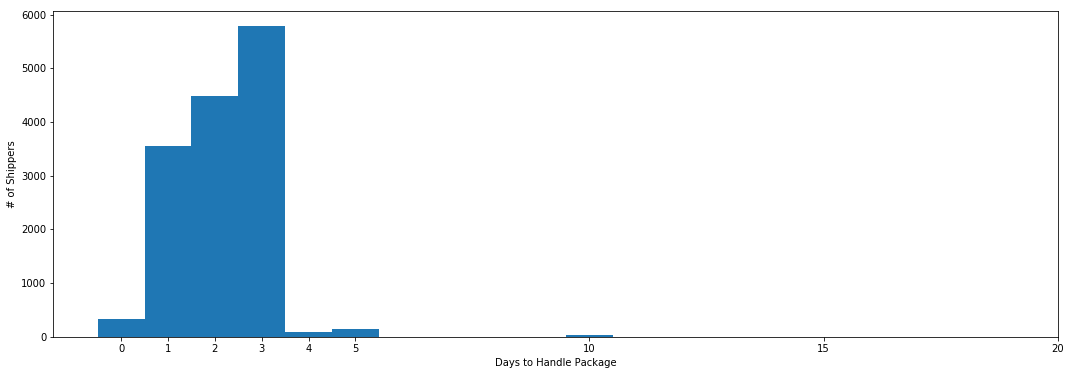

In [25]:
plt.figure(figsize = (18,6))
times = pd.Series([item.ship_handling_time for item in items if item.ship_handling_time != None])
plt.hist(times, bins=np.arange(max(times))-.5)
plt.xticks(sorted(times.value_counts().index))
plt.xlabel('Days to Handle Package')
plt.ylabel('# of Shippers')
plt.show()

__Duration of Auction in Days__:

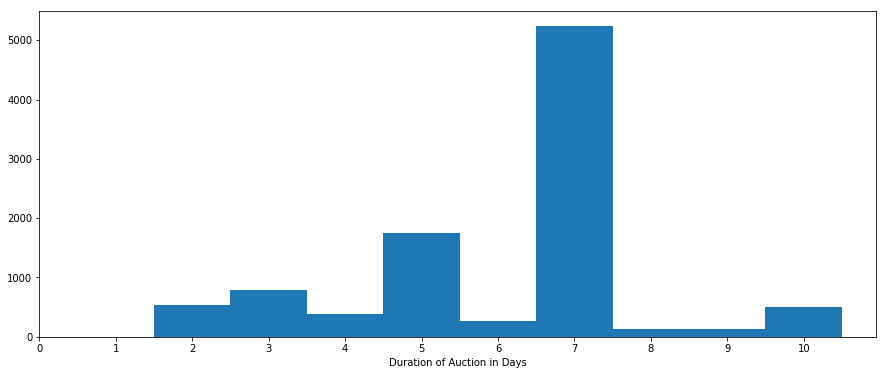

In [26]:
plt.figure(figsize = (15,6))
plt.hist([item.duration/24 for item in items], bins = np.arange(10)+1.5)
plt.xticks(range(11))
plt.xlabel('Duration of Auction in Days')
plt.show()

**Weekday of Auction Start:**

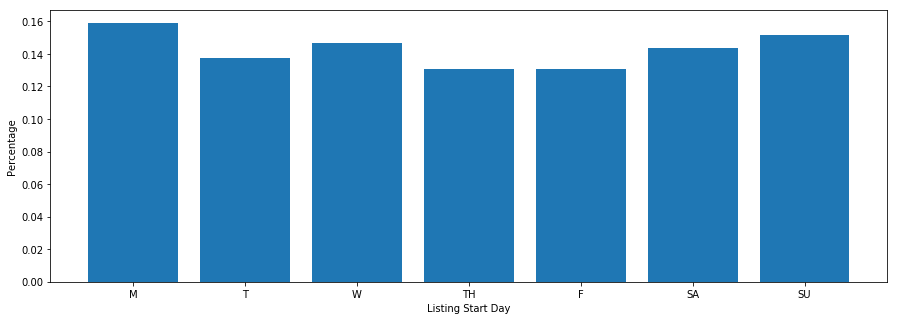

In [27]:
days = pd.Series([item.start_weekday for item in items]).value_counts()
plt.figure(figsize = (15,5))
plt.bar(days.index, days.values/len(items))
plt.xticks(range(7), 'M T W TH F SA SU'.split(' '))
plt.xlabel("Listing Start Day")
plt.ylabel('Percentage')
plt.show()

**Weekday of Auction End:**

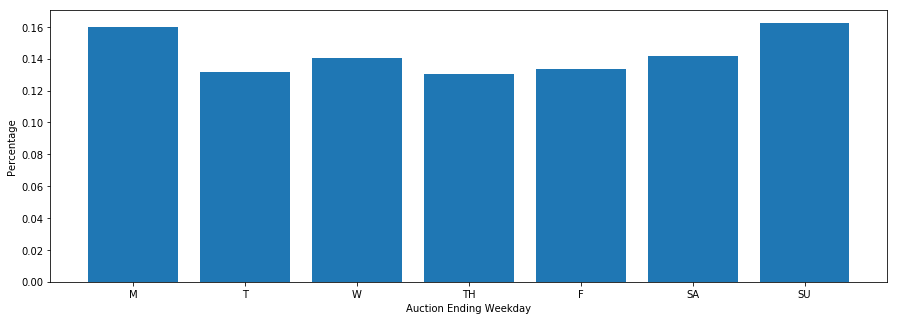

In [28]:
days = pd.Series([item.end_weekday for item in items]).value_counts()
plt.figure(figsize = (15,5))
plt.bar(days.index, days.values/len(items))
plt.xticks(range(7), 'M T W TH F SA SU'.split(' '))
plt.ylabel('Percentage')
plt.xlabel("Auction Ending Weekday")
plt.show()

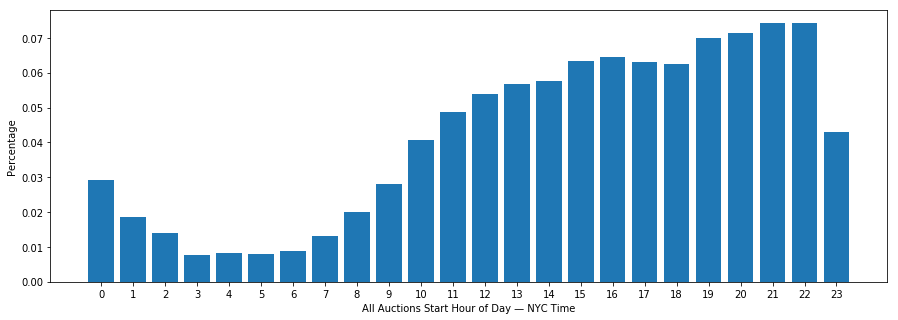

In [29]:
start_hours = pd.Series([item.start_time.hour for item in items]).value_counts()
plt.figure(figsize = (15,5))
plt.bar((start_hours.index-5+24)%24, start_hours.values/len(items))
plt.xticks(range(0,24))
plt.ylabel('Percentage')
plt.xlabel("All Auctions Start Hour of Day — NYC Time")
plt.show()

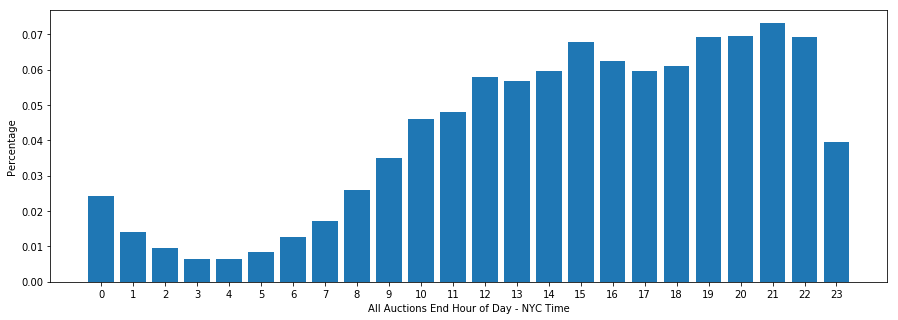

In [30]:
end_hours = pd.Series([item.end_time.hour for item in items]).value_counts()
plt.figure(figsize = (15,5))
plt.bar((end_hours.index - 5 + 24)%24, end_hours.values/len(items))
plt.xticks(range(0,24))
plt.ylabel('Percentage')
plt.xlabel("All Auctions End Hour of Day - NYC Time")
plt.show()

**Percentage of Auctions Offering Returns:**

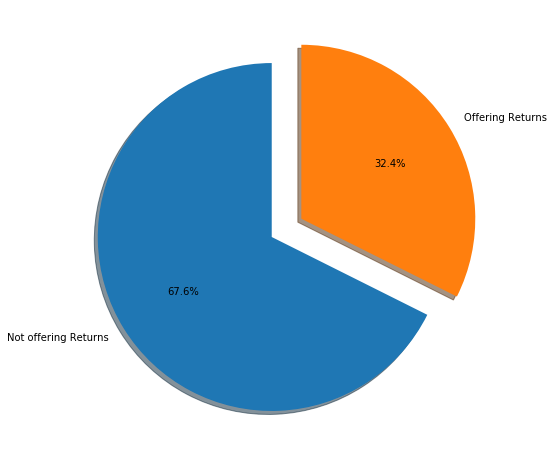

In [31]:
returns = pd.Series([item.returns for item in items]).value_counts()
plt.figure(figsize = (8,8))
plt.pie(returns.values, explode=[.1,.1], labels=['Not offering Returns', 'Offering Returns'], 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

**Return Time Window** (of those offering returns):

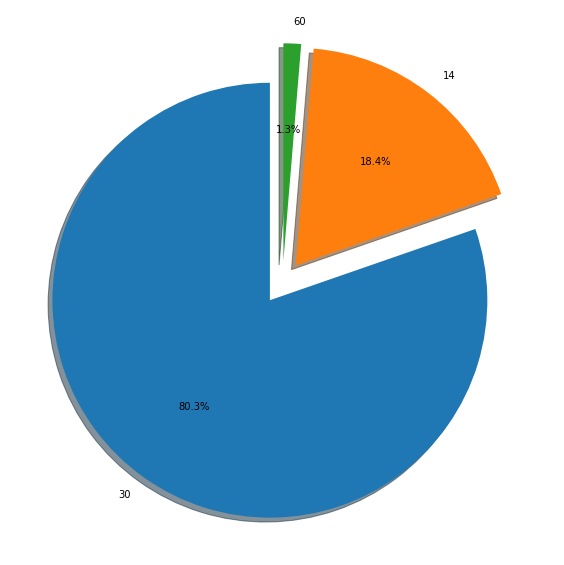

In [32]:
returns = pd.Series([item.returns_time for item in items if item.returns_time > 0]).value_counts()
plt.figure(figsize = (10,10))
plt.pie(returns.values, explode=np.full(len(returns), .1), labels = returns.index, 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

**Offering AutoPay:**

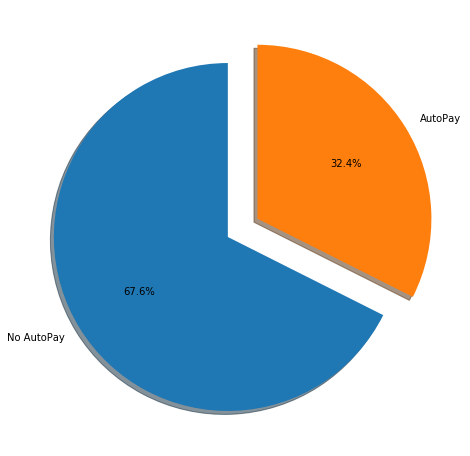

In [33]:
auto = pd.Series([item.autopay for item in items]).value_counts()
plt.figure(figsize = (8,8))
plt.pie(auto.values, explode=[.1,.1], 
        labels=['No AutoPay', 'AutoPay'], 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

****

__"Best Offer":__

In [34]:
print(f'{round((sum(item.best_offer_enabled for item in items) / len(items)*100),2)}% of listings have "Best Offer" enabled. (Potential buyers are allowed to negotiate price)')


43.12% of listings have "Best Offer" enabled. (Potential buyers are allowed to negotiate price)


***

**Countries of Sellers:**

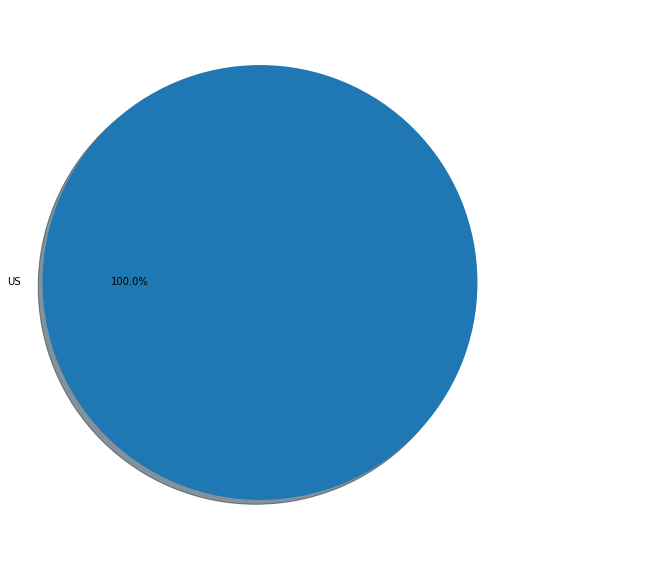

In [35]:
plt.figure(figsize = (10,10))
countries = pd.Series([item.country_seller for item in items]).value_counts()
plt.pie(countries.values, labels=countries.index, 
                            explode = np.full(len(countries), .5), 
        autopct='%1.1f%%',
       shadow = True)
plt.show()

__Seller Karma:__

Ebay Seller Feedback Score:

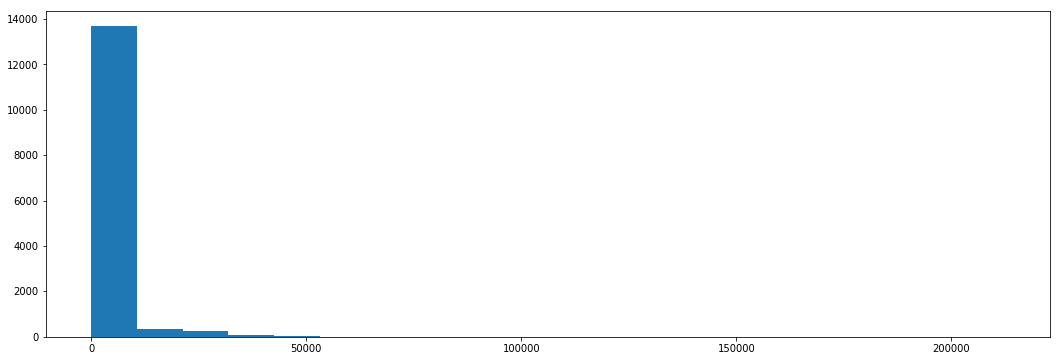

In [36]:
scores = pd.Series([item.seller_feedback_score for item in items])
plt.figure(figsize = (18,6))
plt.hist(scores, bins=20)
plt.show()

In [37]:
scores.min(), scores.max()

(-3.0, 212368.0)

***

## ITEM DETAILS

__US Seller Locations, by Zip Code:__

In [39]:
sales = [(items.zip[0], items.start_time) for items in items if items.country_seller == 'US' and items.zip != None]

def get_usa_zips(url):
    usa_zips = {}
    census_zip_latlon = io.StringIO(requests.get(url).text)
    dialect = csv.Sniffer().sniff(census_zip_latlon.read(1024))
    census_zip_latlon.seek(0)
    reader = csv.reader(census_zip_latlon, dialect)
    for row in reader:
        usa_zips[row[0]] = (row[1], row[2])
    return usa_zips

usa_zips = get_usa_zips(r'https://goo.gl/oYwpRM')

sales = [sale for sale in sales if sale[1] > datetime.strptime('2018-08-01', '%Y-%m-%d')]

def write_kepler_csv():
    with open('../_for_kepler.csv', mode='w') as sale_lat_long_datetime_file:

        sales_writer = csv.writer(sale_lat_long_datetime_file, delimiter=',', 
                                                           quotechar='"', 
                                                           quoting=csv.QUOTE_MINIMAL)

        ## The sample data set I got from the kepler github repo had rows named like so:
        sales_writer.writerow(['latitude','longitude','tpep_sale_datetime'])
        omissions = 0
        
        for sale in sales:
            try:
                datetime = sale[1]
                lat = usa_zips[sale[0]][0]
                lon = usa_zips[sale[0]][1]
                sales_writer.writerow([lat, lon,datetime])
            except KeyError:
                omissions += 1
        print (f"{round((omissions/len(sales))*100, 2)}% of zips were not found")
        
write_kepler_csv()

1.8% of zips were not found


__Countries of Manufacture:__

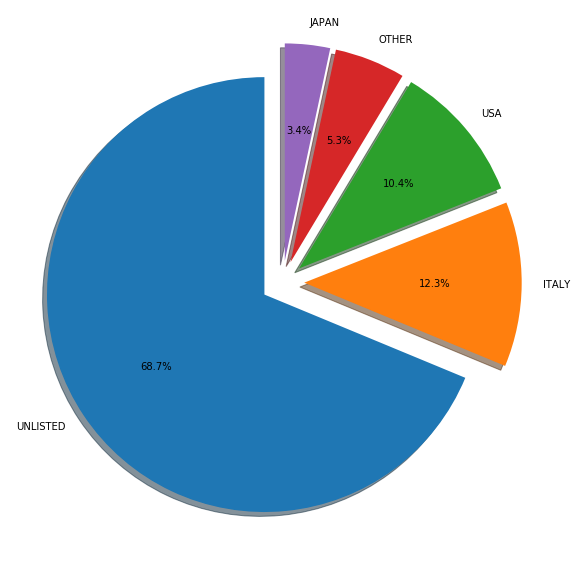

In [40]:
plt.figure(figsize = (10,10))
countries = pd.Series([item.country_manufacture for item in items]).value_counts()
plt.pie(countries.values, labels= countries.index, explode = np.full(len(countries), .1), 
        autopct='%1.1f%%',
       shadow = True,
       startangle=90)
plt.show()

***

**Frame Material**

In [44]:
frame_materials = pd.Series([item.frame_material for item in items]).value_counts()

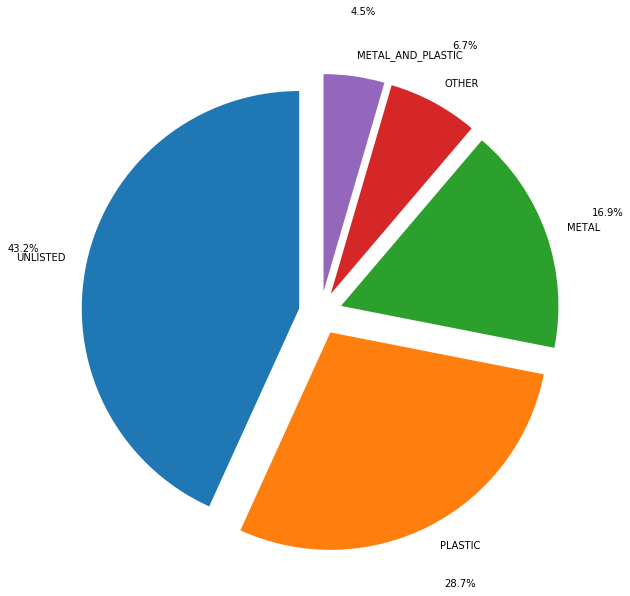

In [45]:
plt.figure(figsize = (10,10))
plt.pie(frame_materials.values, 
        labels = frame_materials.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(frame_materials), .1))
plt.show()

__Brands__

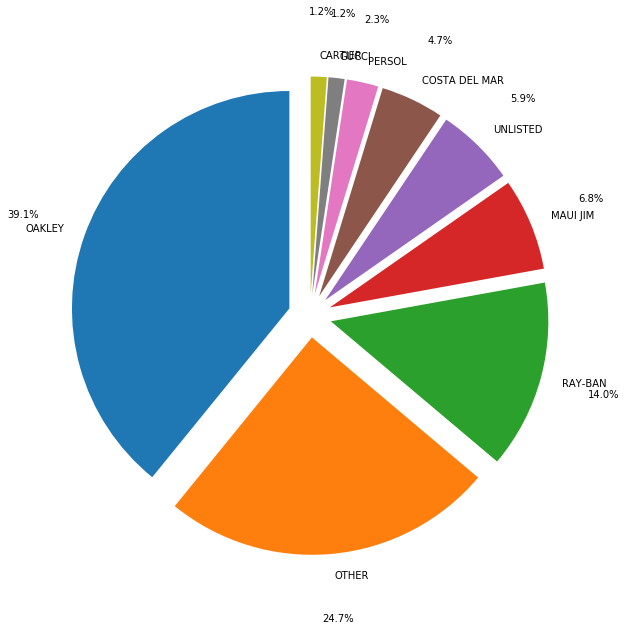

In [46]:
brand_counts = pd.Series([item.brand for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(brand_counts.values, 
        labels = brand_counts.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(brand_counts), .1))
plt.show()

**Lens Tech**

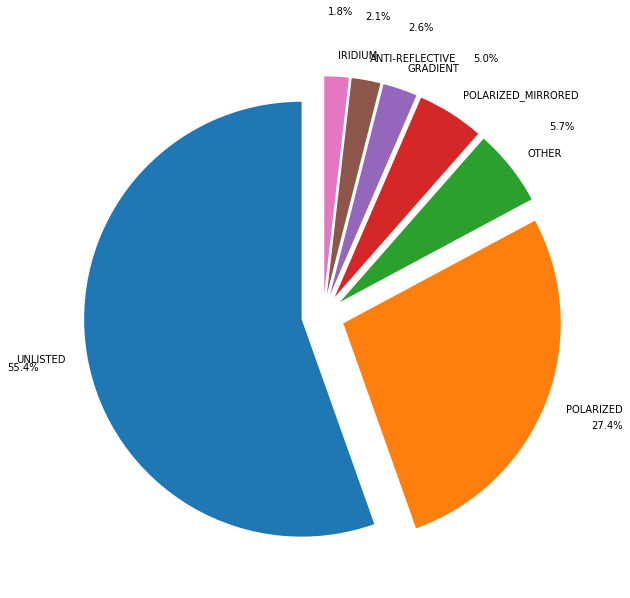

In [47]:
lens_techs = pd.Series([item.lens_tech for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(lens_techs.values, 
        labels = lens_techs.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(lens_techs), .1))
plt.show()

**Frame Color**

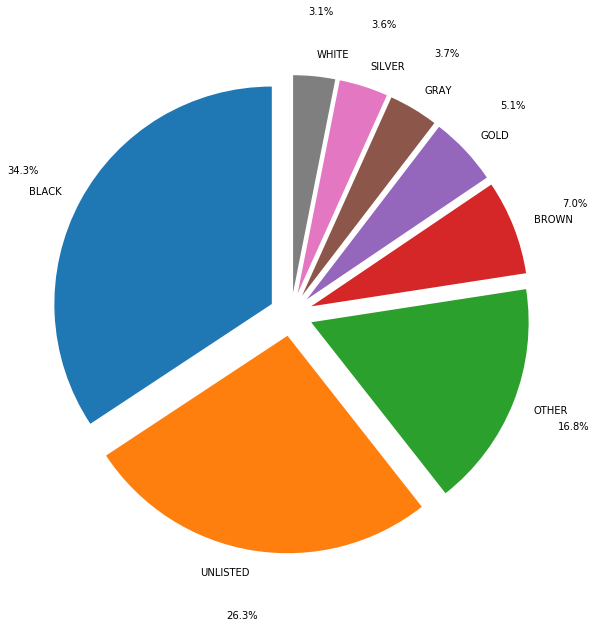

In [48]:
frame_colors = pd.Series([item.frame_color for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(frame_colors.values, 
        labels = frame_colors.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(frame_colors), .1))
plt.show()

**Lens Colors**

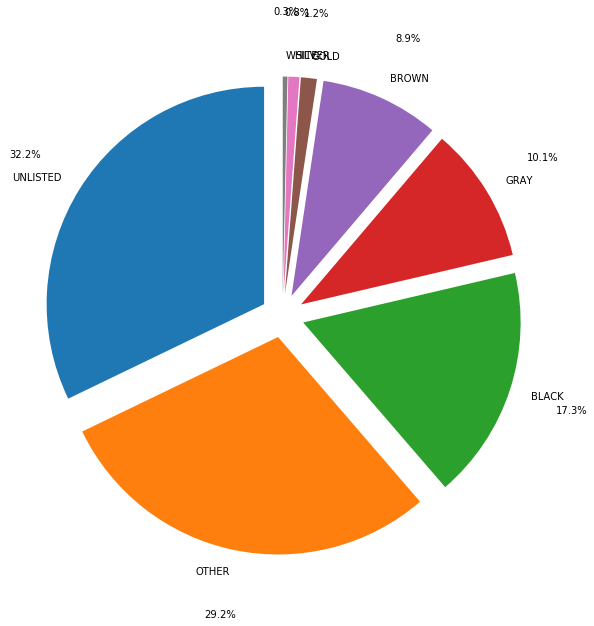

In [49]:
lens_colors = pd.Series([item.lens_color for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(lens_colors.values, 
        labels = lens_colors.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(lens_colors), .1))
plt.show()

**Temple Length Binary**

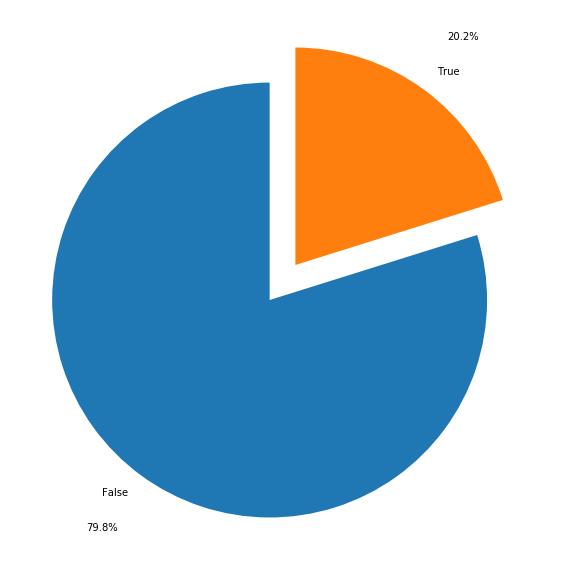

In [50]:
temple_length_binarys = pd.Series([item.temple_length_binary for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(temple_length_binarys.values, 
        labels = temple_length_binarys.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(temple_length_binarys), .1))
plt.show()

**Style**

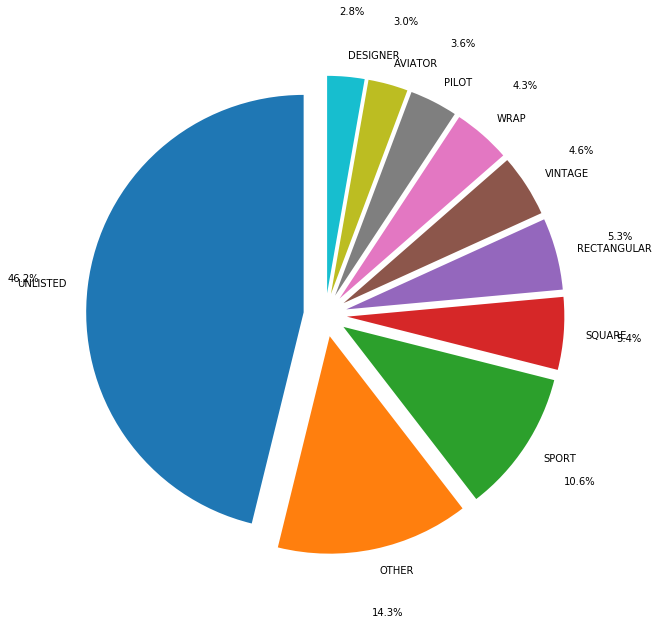

In [51]:
styles = pd.Series([item.style for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(styles.values, 
        labels = styles.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(styles), .1))
plt.show()

**Protection**

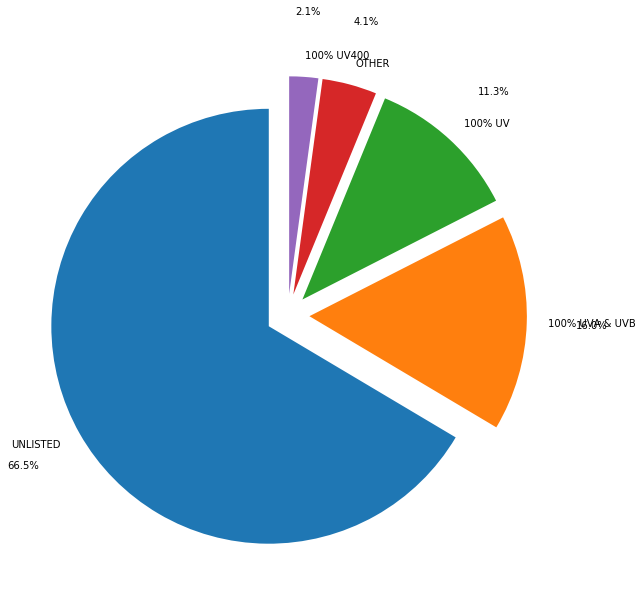

In [52]:
protections = pd.Series([item.protection for item in items]).value_counts()

plt.figure(figsize = (10,10))
plt.pie(protections.values, 
        labels = protections.index,
        autopct='%1.1f%%',
        pctdistance = 1.3,
       startangle=90,
        explode = np.full(len(protections), .1))
plt.show()

In [ ]:
items[300]._Shade_Sale__body